# Polynomial Regression with SciKit-Learn

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv('..\data\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Scikit Learn

In [4]:
X = df.drop('sales',axis=1)
y = df['sales']

## Preprocessing PolynomialFeatures

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._polynomial:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Read more in the :ref:`User Guide <polynomial_features>`.
 |  
 |  Parameters
 |  ----------
 |  degree : int or tuple (min_degree, max_degree), default=2
 |      If a single int is given, it specifies the maximal degree of the
 |      polynomial features. If a tuple `(min_degree, max_degree)` is passed,
 |      then `min_degree` is the minimum and `max_degree` is the maximum
 |

In [7]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias= False)

In [8]:
poly_features = polynomial_converter.fit_transform(X)

In [9]:
poly_features.shape

(200, 9)

In [10]:
X.shape

(200, 3)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [14]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

The interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [15]:
230.1 *37.8

8697.779999999999

In [16]:
230.1 *  69.2

15922.92

In [17]:
37.8 * 69.2

2615.7599999999998

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size =0.3, random_state=101)

#### Modeling for fitting Polynmial Data

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [22]:
model = LinearRegression(fit_intercept = True)

## Fit/Training the Model the training data

In [23]:
model.fit(X_train, y_train)

LinearRegression()


-----

### Evaluation on the Test Set

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [24]:
test_predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [27]:
MAE

0.4896798044803558

In [28]:
MSE

0.44175055104033756

In [29]:
RMSE

0.664643175726899

In [30]:
df['sales'].mean()

14.022500000000003

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

In [31]:
# training error per degree

train_rmse_errors = []

# test error perdegree

test_rmse_errors = []

for d in range(1,10):
    
    # create poly data set per degree 'd'
    polynomial_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Split 
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size= 0.3, random_state = 101)
    
    
    # Training on this new poly set
    model = LinearRegression(fit_intercept= True)
    model.fit(X_train, y_train)
    
    # Predict on both train and test
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    
    # Calculate errors
    
    # Error on train set
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
    
    # Error on test set
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
    
    # Append error to lists for plotting later
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    
    

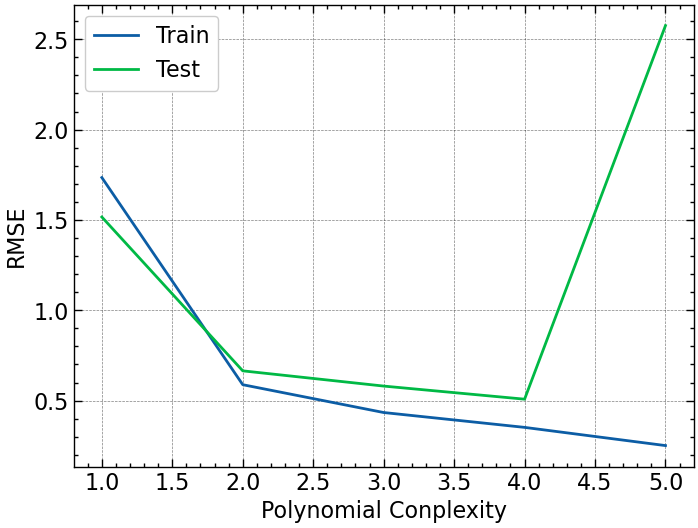

In [32]:
plt.style.use(['science','notebook','grid'])

plt.plot(range(1,6),train_rmse_errors[:5], label='Train')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test')
plt.xlabel('Polynomial Conplexity')
plt.ylabel('RMSE')
plt.legend();

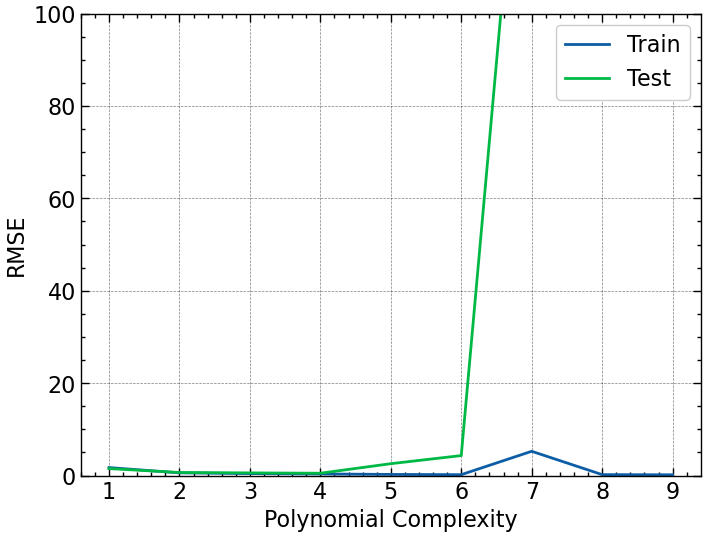

In [33]:
plt.plot(range(1, 10), train_rmse_errors, label='Train')
plt.plot(range(1, 10), test_rmse_errors, label='Test')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.ylim(0, 100)
plt.legend();

## Finalizing Model Choice
There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

Choose final parameters based on test metrics
Retrain on all data
Save Polynomial Converter object
Save model

In [34]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [35]:
final_model = LinearRegression()

In [36]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()

## Saving Model and Converter

In [37]:
from joblib import dump, load

In [38]:
dump(final_model, 'Model/sales_poly_model.joblib') # model

['Model/sales_poly_model.joblib']

In [39]:
dump(final_poly_converter, 'Model/poly_converter.joblib')

['Model/poly_converter.joblib']

## Deployment and Predictions

### Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [40]:
loaded_poly = load('Model/poly_converter.joblib')
loaded_model = load('Model/sales_poly_model.joblib')

In [41]:
campaign = [[149,22,12]]

In [42]:
campaign_poly = loaded_poly.transform(campaign)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [43]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [44]:
final_model.predict(campaign_poly)

array([14.64501014])